### Install jsonlines if you need it

import sys
!conda install --yes --prefix {sys.prefix} jsonlines

### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import jsonlines

## Read the simulation output

First as raw JSON lines

In [2]:
HISTORY_FILE = 'data1K-2agents/Data/history_file_baseline_2agents.json'

In [3]:
history = []
with jsonlines.open(HISTORY_FILE) as reader:
    for obj in reader:
        history.append(obj)

Functions to process the history

In [4]:
def process_history(history, fair=True, compat=True, alloc=True, lists=True):
    if fair:
        fair_list = [entry['allocation']['fairness scores'] for entry in history]
        fair_df = pd.DataFrame(fair_list)
    else:
        fair_df = None
        
    if compat:
        compat_list = [entry['allocation']['compatibility scores'] for entry in history]
        compat_df = pd.DataFrame(compat_list)
    else:
        compat_df = None
        
    if alloc:
        alloc_list = [entry['allocation']['output'] for entry in history]
        alloc_df = pd.DataFrame(alloc_list)
    else:
        alloc_df = None
        
    if lists:
        results_list = [process_results(entry['choice']['output']['results']) for entry in history]
    else:
        results_list = None
        
    return fair_df, compat_df, alloc_df, results_list

def process_results(result_structs):
    return [(entry['item'], entry['score']) for entry in result_structs]
        

Get the individual data frames and result lists

In [5]:
fair_df, compat_df, alloc_df, results = process_history(history)

In [6]:
fair_df

,Agent1,Agent2
0,1.000000,1.000000
1,0.133333,0.400000
2,0.200000,0.700000
3,0.266667,0.666667
4,0.266667,0.550000
...,...,...
995,0.320000,0.540000
996,0.333333,0.540000
997,0.306667,0.540000
998,0.333333,0.520000


In [7]:
compat_df

,Agent1,Agent2
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0
...,...,...
995,0.0,0.0
996,0.0,0.0
997,0.0,0.0
998,0.0,0.0


In [8]:
alloc_df

,Agent1,Agent2
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
995,0.0,0.0
996,0.0,0.0
997,0.0,0.0
998,0.0,0.0


In [9]:
results[0]

[('42', 1.002027587759301),
 ('36', 0.9878772523810716),
 ('57', 0.9807342866560074),
 ('41', 0.9748479010875364),
 ('10', 0.9693499584234531),
 ('60', 0.9585936423507866),
 ('97', 0.9465247190654296),
 ('85', 0.9432903274783636),
 ('70', 0.9319414287410432),
 ('61', 0.9314771081543451)]

## Visualizations

Simple plot of the fairness values computed at each iteration

<Axes: xlabel='index', ylabel='value'>

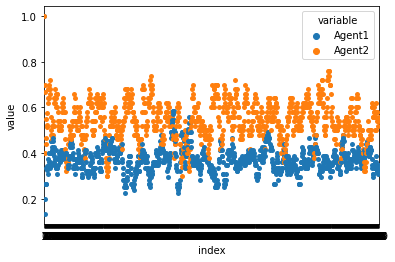

In [10]:
fair_df_melt = fair_df.reset_index().melt(id_vars=['index'])
sb.stripplot(data=fair_df_melt, x='index', y='value', hue='variable', dodge=True)

Same for allocation

<Axes: xlabel='index', ylabel='value'>

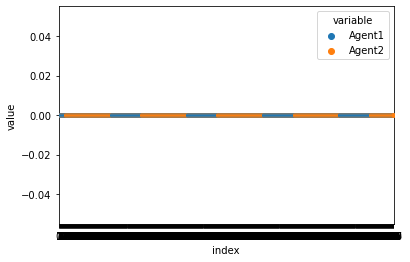

In [11]:
alloc_df_melt = alloc_df.reset_index().melt(id_vars=['index'])
sb.stripplot(data=alloc_df_melt, x='index', y='value', hue='variable', dodge=True)